# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
## 2. Load data

In [2]:
df = pd.read_csv('./clean_data_after_eda.csv')

In [3]:
df.reindex().head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,dec_price_off_peak_var,dec_price_off_peak_fix,jan_price_off_peak_var,jan_price_off_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.124617,0.096216,0.055364,41.613396,18.327998,12.218666,0.146033,44.26693,0.125976,40.565969
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147208,0.021371,0.000000,44.400265,0.000000,0.000000,0.147600,44.44471,0.151367,44.266931
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,0.167798,44.44471,0.172468,44.266931


In [4]:
df['date_renewal'] = pd.to_datetime(df['date_renewal'])

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [5]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [6]:
df['offpeak_diff_dec_jan_energy'] = df['dec_price_off_peak_var'] - df['jan_price_off_peak_var']
df['offpeak_diff_dec_jan_power'] = df['dec_price_off_peak_fix'] - df['jan_price_off_peak_fix']

In [7]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,dec_price_off_peak_var,dec_price_off_peak_fix,jan_price_off_peak_var,jan_price_off_peak_fix,offpeak_diff_dec_jan_energy,offpeak_diff_dec_jan_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.055364,41.613396,18.327998,12.218666,0.146033,44.266930,0.125976,40.565969,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,44.400265,0.000000,0.000000,0.147600,44.444710,0.151367,44.266931,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,44.444710,0.000000,0.000000,0.167798,44.444710,0.172468,44.266931,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,44.444710,0.000000,0.000000,0.148586,44.444710,0.153133,44.266931,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.073719,40.728885,24.437330,16.291555,0.119906,40.728885,0.126098,40.565969,-0.006192,0.162916


In [8]:
# Creating model dataset
model_data = df[['id',
           'channel_sales',
           'cons_12m',
           'cons_gas_12m', 
           'cons_last_month',
           'forecast_cons_12m',
           'forecast_cons_year',
           'forecast_discount_energy',
           'forecast_meter_rent_12m',
           'forecast_price_energy_off_peak',
           'forecast_price_energy_peak',
           'forecast_price_pow_off_peak',
           'has_gas',
           'imp_cons',
           'margin_gross_pow_ele',
           'margin_net_pow_ele',
           'nb_prod_act',
           'net_margin',
           'num_years_antig',
           'origin_up',
           'pow_max',
           'date_activ_year',
           'date_end_year',
           'date_modif_prod_year',        
           'date_renewal_year',
           'dec_price_off_peak_var',
           'dec_price_off_peak_fix',
           'jan_price_off_peak_var',
           'jan_price_off_peak_fix',
           'offpeak_diff_dec_jan_energy',
           'offpeak_diff_dec_jan_power',
           'churn']]

In [9]:
model_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,date_end_year,date_modif_prod_year,date_renewal_year,dec_price_off_peak_var,dec_price_off_peak_fix,jan_price_off_peak_var,jan_price_off_peak_fix,offpeak_diff_dec_jan_energy,offpeak_diff_dec_jan_power,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,2016,2015,2015,0.146033,44.266930,0.125976,40.565969,0.020057,3.700961,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,2016,2009,2015,0.147600,44.444710,0.151367,44.266931,-0.003767,0.177779,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,2016,2010,2015,0.167798,44.444710,0.172468,44.266931,-0.004670,0.177779,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,2016,2010,2015,0.148586,44.444710,0.153133,44.266931,-0.004547,0.177779,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,2016,2010,2015,0.119906,40.728885,0.126098,40.565969,-0.006192,0.162916,0


In [10]:
# Finding the unique values 
for i in ['channel_sales','has_gas','origin_up','date_activ_year','date_end_year','date_modif_prod_year','date_renewal_year','churn']:
    print(i)
    print(model_data[i].unique())

channel_sales
['foosdfpfkusacimwkcsosbicdxkicaua' 'MISSING'
 'lmkebamcaaclubfxadlmueccxoimlema' 'usilxuppasemubllopkaafesmlibmsdf'
 'ewpakwlliwisiwduibdlfmalxowmwpci' 'epumfxlbckeskwekxbiuasklxalciiuu'
 'sddiedcslfslkckwlfkdpoeeailfpeds' 'fixdbufsefwooaasfcxdxadsiekoceaa']
has_gas
['t' 'f']
origin_up
['lxidpiddsbxsbosboudacockeimpuepw' 'kamkkxfxxuwbdslkwifmmcsiusiuosws'
 'ldkssxwpmemidmecebumciepifcamkci' 'MISSING'
 'usapbepcfoloekilkwsdiboslwaxobdp' 'ewxeelcelemmiwuafmddpobolfuxioce']
date_activ_year
[2013 2009 2010 2011 2012 2005 2004 2007 2008 2006 2003 2014]
date_end_year
[2016 2017]
date_modif_prod_year
[2015 2009 2010 2011 2013 2012 2014 2004 2016 2007 2005 2008 2006 2003]
date_renewal_year
[2015 2016 2014 2013]
churn
[1 0]


---
## 4. Modeling Data For Training

### Encoding Categorical Data

In [11]:
from sklearn.preprocessing import LabelEncoder

# Define the columns that need label encoding (assuming they are categorical)
categorical_columns = ['channel_sales','origin_up']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    model_data[col] = label_encoder.fit_transform(model_data[col])

C:\Users\aariz\AppData\Local\Temp\ipykernel_2236\2227772632.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data[col] = label_encoder.fit_transform(model_data[col])
C:\Users\aariz\AppData\Local\Temp\ipykernel_2236\2227772632.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data[col] = label_encoder.fit_transform(model_data[col])


In [12]:
model_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,date_end_year,date_modif_prod_year,date_renewal_year,dec_price_off_peak_var,dec_price_off_peak_fix,jan_price_off_peak_var,jan_price_off_peak_fix,offpeak_diff_dec_jan_energy,offpeak_diff_dec_jan_power,churn
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,0.00,0,0.0,1.78,0.114481,...,2016,2015,2015,0.146033,44.266930,0.125976,40.565969,0.020057,3.700961,1
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,189.95,0,0.0,16.27,0.145711,...,2016,2009,2015,0.147600,44.444710,0.151367,44.266931,-0.003767,0.177779,0
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,47.96,0,0.0,38.72,0.165794,...,2016,2010,2015,0.167798,44.444710,0.172468,44.266931,-0.004670,0.177779,0
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,240.04,0,0.0,19.83,0.146694,...,2016,2010,2015,0.148586,44.444710,0.153133,44.266931,-0.004547,0.177779,0
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,445.75,526,0.0,131.73,0.116900,...,2016,2010,2015,0.119906,40.728885,0.126098,40.565969,-0.006192,0.162916,0


In [13]:
model_data['channel_sales'].unique()

array([4, 0, 5, 7, 2, 1, 6, 3])

In [14]:
model_data['origin_up'].unique()

array([4, 2, 3, 0, 5, 1])

In [15]:
# Transforming to numeric values
model_data['has_gas'] = model_data['has_gas'].replace({'t': 1, 'f': 0})

C:\Users\aariz\AppData\Local\Temp\ipykernel_2236\2653251043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['has_gas'] = model_data['has_gas'].replace({'t': 1, 'f': 0})


In [16]:
correlation = model_data.drop(columns='id').corr()

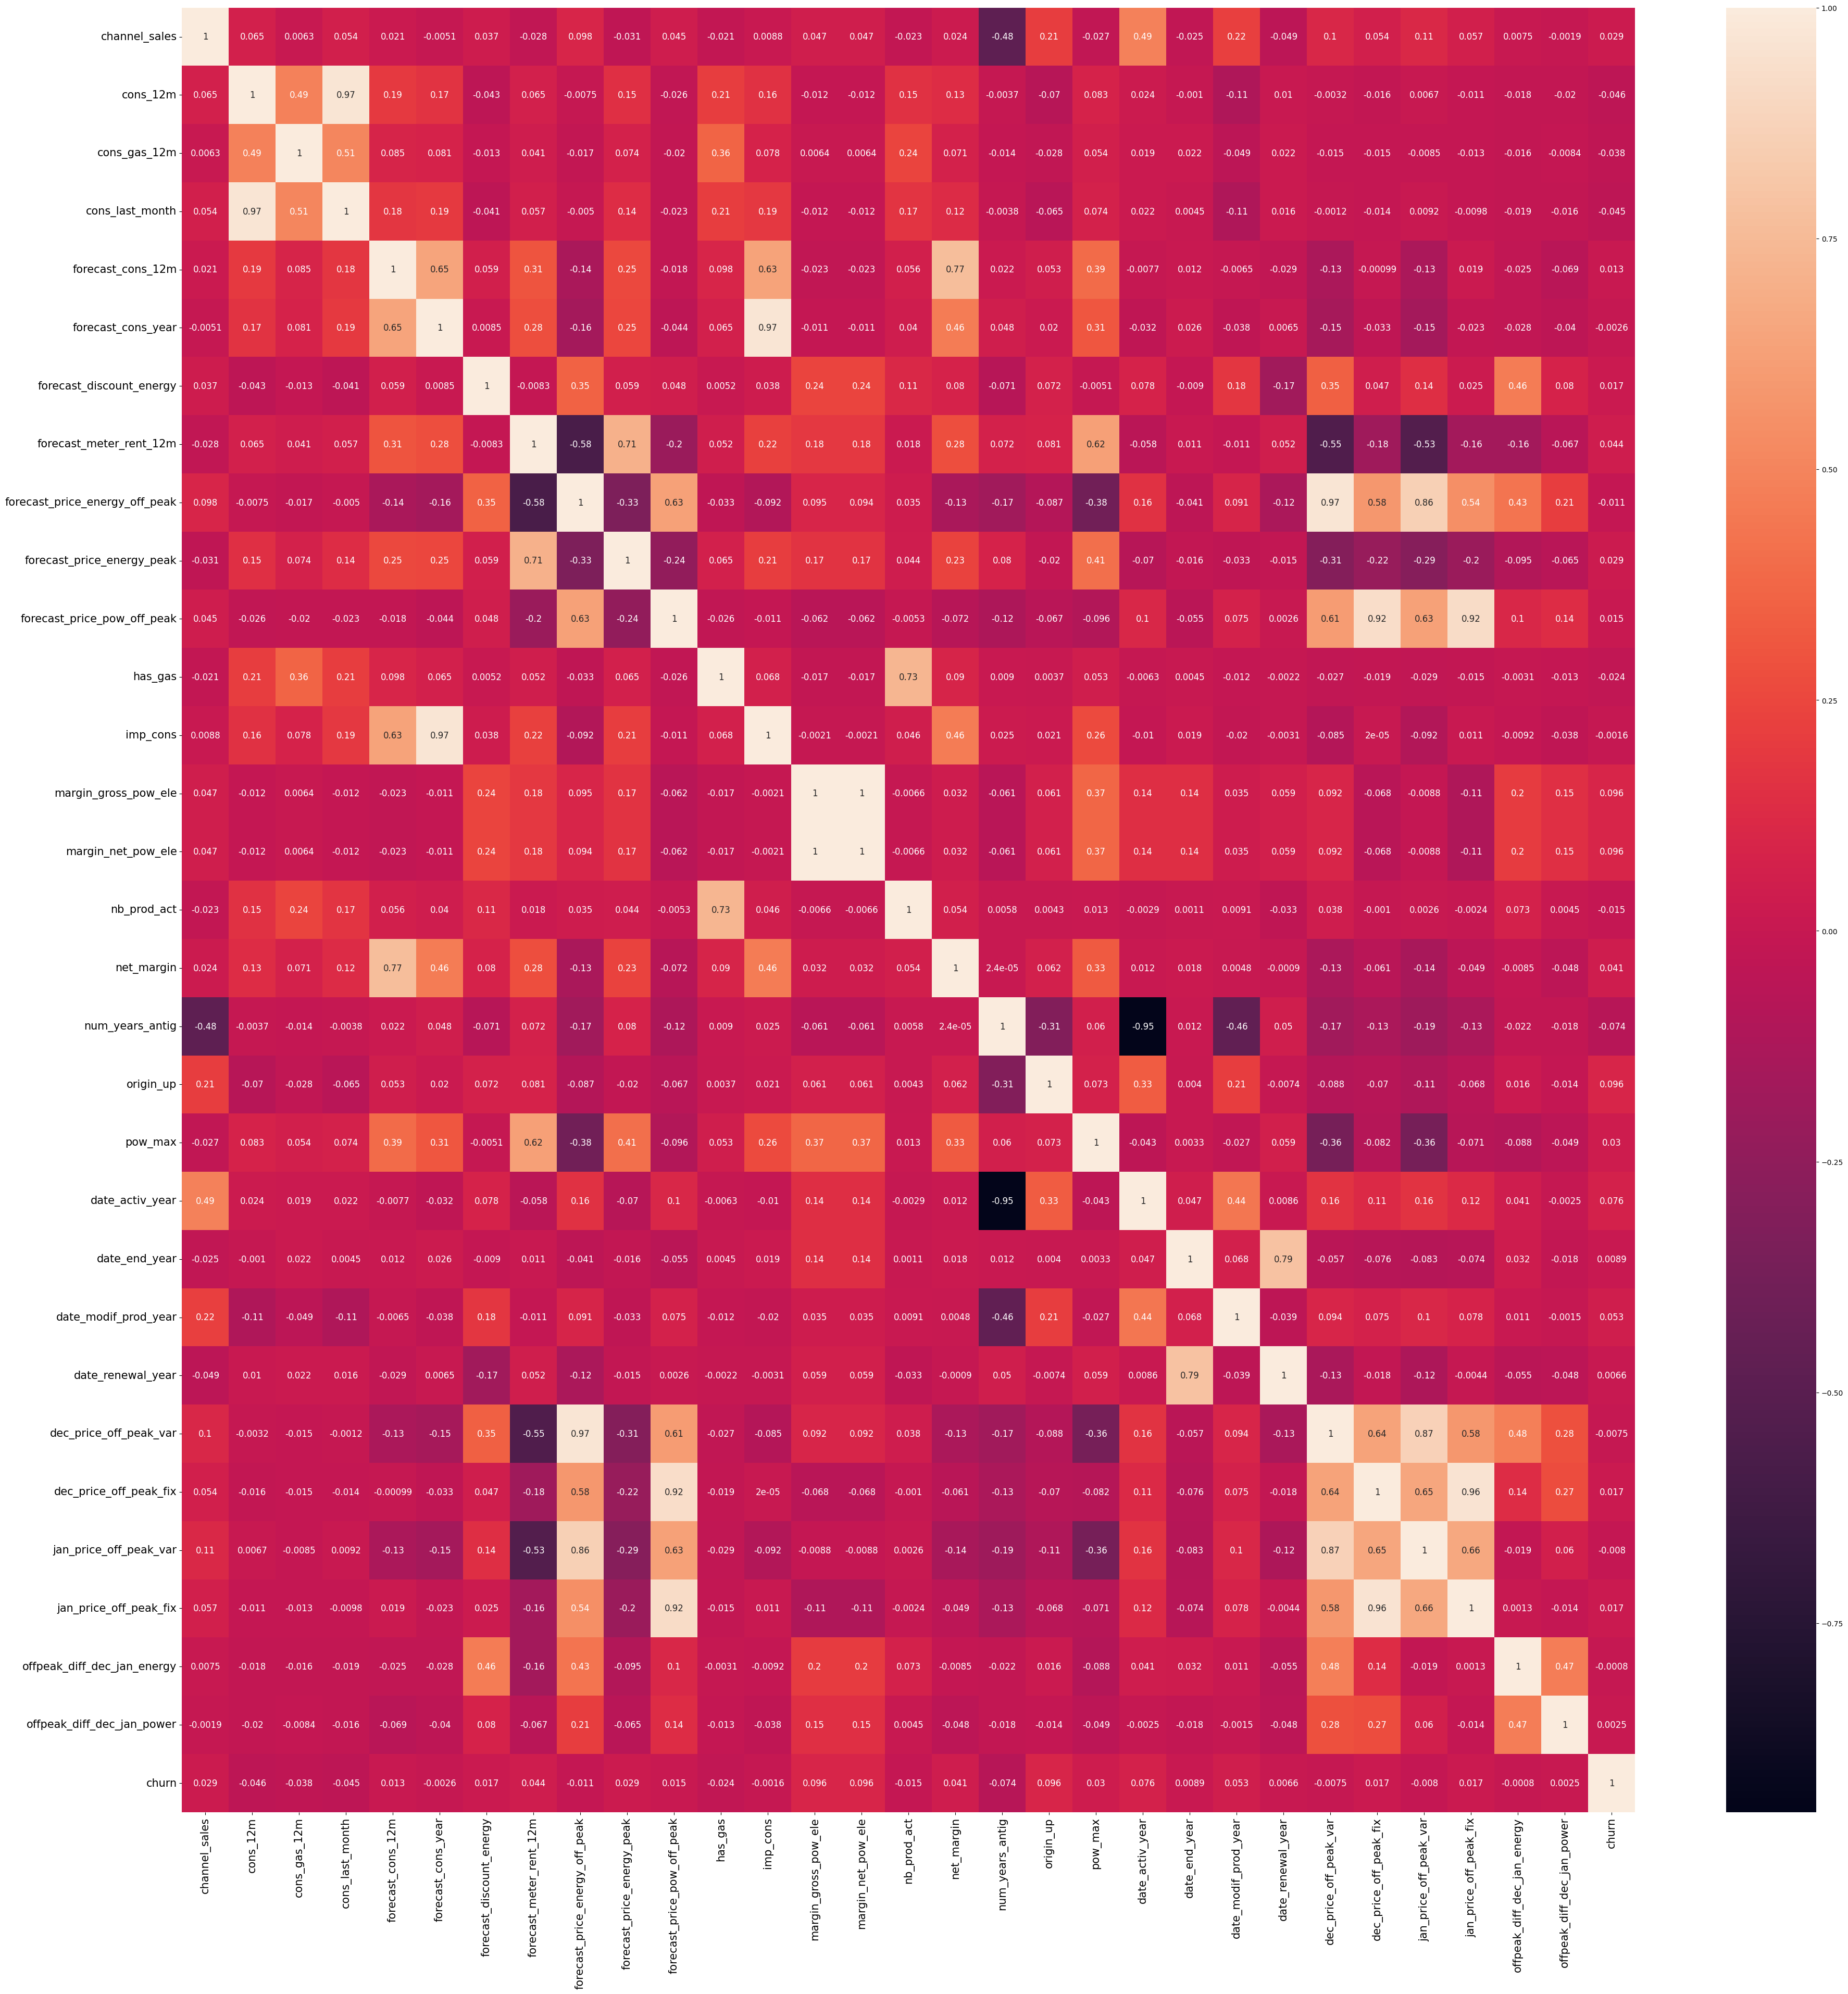

In [17]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

---
## 5) Modeling

## *Why do we use Random Forest for this Dataset*?
1. **Classification**:
Random Forest is widely used for classification tasks where the goal is to predict the category or class labels of input data.

2. **Imbalanced Data**:
Random Forest can handle imbalanced datasets well, like in this case we have no. of retention is very much larger than the no. of churn in this dataset.

3. **High-Dimensional Data**:
Random Forest is suitable for datasets with a large number of features (high-dimensional data) without the need for feature scaling or dimensionality reduction techniques.

### Importing Libraries

In [18]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### Data Sampling

In [19]:
X = model_data.drop(columns=['id','churn']) 
Y = model_data['churn'] # Target variable

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [21]:
print('Size of train set : ',len(X_train))
print('Size of test set : ',len(X_test))

Size of train set :  10938
Size of test set :  3646


### Training Model

## *Key Points for building the model*

1. **Define the Parameter Grid to Search**:
   - `param_grid`: This dictionary specifies the hyperparameters to search over. In this case, it only includes the number of estimators (`n_estimators`), with a range of values `[50, 100, 200, 500, 1000]`.

2. **Create a Random Forest Classifier**:
   - `rf_classifier`: Instantiate a Random Forest classifier object.

3. **Instantiate the GridSearchCV Object**:
   - `GridSearchCV`: This class performs hyperparameter tuning using cross-validation.
   - `estimator`: The estimator object to use. Here, it's the Random Forest classifier.
   - `param_grid`: The parameter grid to search over.
   - `cv`: Number of cross-validation folds.
   - `scoring`: The evaluation metric to optimize. In this case, it's set to `'accuracy'`.
   - `n_jobs`: Number of jobs to run in parallel during the grid search. `-1` means using all available CPU cores.

4. **Fit the Grid Search to the Data**:
   - `grid_search.fit(X_train, Y_train)`: This line fits the grid search object to the training data (`X_train` and `Y_train`). It performs an exhaustive search over the specified parameter grid, evaluating the performance of each combination using cross-validation.

5. **Print the Best Parameters Found**:
   - `grid_search.best_params_`: This attribute returns the best hyperparameters found during the grid search.

6. **Get the Best Model**:
   - `best_rf_classifier = grid_search.best_estimator_`: This line retrieves the best model found during the grid search.

7. **Evaluate the Best Model on the Test Set**:
   - `accuracy = best_rf_classifier.score(X_test, Y_test)`: This line calculates the accuracy of the best model on the test set (`X_test` and `Y_test`) using the `score` method, which returns the mean accuracy of the model.

In [22]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
}

# Create a random forest classifier
rf_classifier = RandomForestClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters found
print("Best parameters found by grid search:")
print(grid_search.best_params_)

# Get the best model
best_rf_classifier = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_rf_classifier.score(X_test, Y_test)
print("Accuracy of the best model on the test set:", accuracy)


Best parameters found by grid search:
{'n_estimators': 1000}
Accuracy of the best model on the test set: 0.9105869445968184


For this example, I am using `n_estimators` = 1000. This means that my random forest will consist of 1000 decision trees. There are many more parameters that you can fine-tune within the random forest and finding the optimal combinations of parameters can be a manual task of exploration, trial and error, which will not be covered during this notebook.

In [23]:
from sklearn.metrics import classification_report

# Make predictions on the test set using the best model
predictions = best_rf_classifier.predict(X_test)

# Compute and print classification report
print("Classification Report:")
print(classification_report(Y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3300
           1       0.88      0.07      0.12       346

    accuracy                           0.91      3646
   macro avg       0.90      0.53      0.54      3646
weighted avg       0.91      0.91      0.87      3646



## *Model Classification Report*

1. **Explaining Model Performance**:
   - The model achieved an overall accuracy of approximately 91% on the test set, which indicates that it correctly classified about 91% of the instances.
   - Looking at the classification report, the precision for class 0 (non-churn) is high (91%), suggesting that when the model predicts a customer will not churn, it is correct 91% of the time. However, the precision for class 1 (churn) is lower (92%), indicating that the model is less precise in predicting churn. This is further evidenced by the low recall for class 1 (6%), meaning the model is missing a significant portion of actual churn cases.
   - The F1-score, which is the harmonic mean of precision and recall, is low for class 1 (12%). This suggests that the model's ability to correctly identify churn cases (true positives) is poor compared to its ability to correctly identify non-churn cases.

2. **Choice of Evaluation Metrics**:
   - In this binary classification problem, where identifying churn is likely a critical business objective, precision, recall, and F1-score are important metrics to evaluate the model's performance.
   - Precision measures the proportion of true positives among all positive predictions, focusing on the accuracy of positive predictions.
   - Recall measures the proportion of true positives that were correctly identified among all actual positives, focusing on the model's ability to capture all positive instances.
   - F1-score provides a balance between precision and recall, considering both false positives and false negatives.
   - Accuracy alone may not be sufficient, especially in imbalanced datasets like this one where there are significantly more non-churn instances than churn instances.

3. **Advantages and Disadvantages of Random Forest**:
   - **Advantages**:
     - Random Forest is robust to overfitting and performs well with default hyperparameters.
     - It can handle both numerical and categorical features without the need for feature scaling.
     - Random Forest provides feature importances, which can help interpret the model and identify important predictors.
     - It can handle high-dimensional datasets and is relatively easy to tune.
   - **Disadvantages**:
     - Random Forest can be computationally expensive, especially with a large number of trees and features.
     - Interpretability may be limited compared to simpler models like decision trees.
     - Random Forest may not perform well on very imbalanced datasets without additional techniques like class weighting or resampling.

4. **Model Performance Satisfaction**:
   - The model's performance is satisfactory in terms of overall accuracy, but it underperforms in correctly identifying churn cases (class 1).
   - The low recall for churn (class 1) suggests that the model misses a significant portion of actual churn cases, which could be problematic for a business trying to retain customers.
   - Improving the model's performance on identifying churn cases should be a priority, possibly by adjusting class weights, using different evaluation thresholds, or exploring other algorithms better suited to handling imbalanced data.

---
## 6) Predicting churn

In [24]:
comp_data = model_data.copy()

In [25]:
comp_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,date_end_year,date_modif_prod_year,date_renewal_year,dec_price_off_peak_var,dec_price_off_peak_fix,jan_price_off_peak_var,jan_price_off_peak_fix,offpeak_diff_dec_jan_energy,offpeak_diff_dec_jan_power,churn
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,0.00,0,0.0,1.78,0.114481,...,2016,2015,2015,0.146033,44.266930,0.125976,40.565969,0.020057,3.700961,1
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,189.95,0,0.0,16.27,0.145711,...,2016,2009,2015,0.147600,44.444710,0.151367,44.266931,-0.003767,0.177779,0
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,47.96,0,0.0,38.72,0.165794,...,2016,2010,2015,0.167798,44.444710,0.172468,44.266931,-0.004670,0.177779,0
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,240.04,0,0.0,19.83,0.146694,...,2016,2010,2015,0.148586,44.444710,0.153133,44.266931,-0.004547,0.177779,0
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,445.75,526,0.0,131.73,0.116900,...,2016,2010,2015,0.119906,40.728885,0.126098,40.565969,-0.006192,0.162916,0


In [26]:
# Applying discount of 20%
comp_data['dec_price_off_peak_fix']=model_data['dec_price_off_peak_fix'] * 0.8
comp_data['dec_price_off_peak_var']=model_data['dec_price_off_peak_var'] * 0.8
comp_data['jan_price_off_peak_fix']=model_data['jan_price_off_peak_fix'] * 0.8
comp_data['jan_price_off_peak_var']=model_data['jan_price_off_peak_var'] * 0.8

In [27]:
comp_data['offpeak_diff_dec_jan_energy'] = comp_data['dec_price_off_peak_var'] - comp_data['jan_price_off_peak_var']
comp_data['offpeak_diff_dec_jan_power'] = comp_data['dec_price_off_peak_fix'] - comp_data['jan_price_off_peak_fix']

In [28]:
target_column = 'churn'
X_comp = comp_data.drop(columns=[target_column, 'id'])
Y_comp_true = comp_data[target_column]

predicted_Y = best_rf_classifier.predict(X_comp)

comp_data['churn_after_discount'] = predicted_Y

comp_data[['churn','churn_after_discount']].head()

,churn,churn_after_discount
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0


In [29]:
len(comp_data)

14584

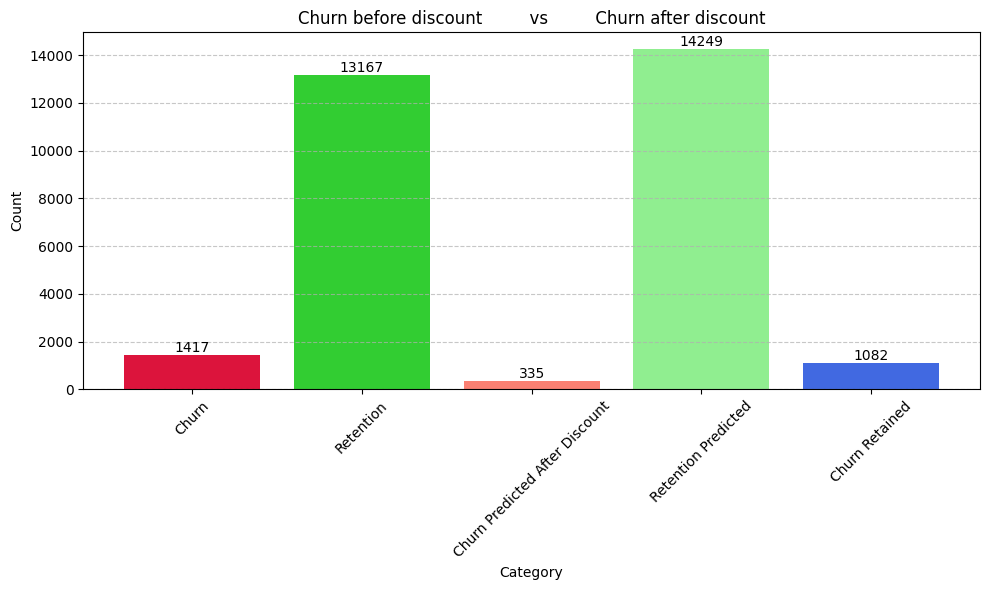

In [30]:
# Define counts
counts = {
    'Churn': len(comp_data[comp_data['churn'] == 1]),
    'Retention': len(comp_data[comp_data['churn'] == 0]),
    'Churn Predicted After Discount': len(comp_data[comp_data['churn_after_discount'] == 1]),
    'Retention Predicted': len(comp_data[comp_data['churn_after_discount'] == 0]),
    'Churn Retained': len(comp_data[comp_data['churn'] == 1]) - len(comp_data[comp_data['churn_after_discount'] == 1])
}

# Define colors
colors = ['crimson', 'limegreen', 'salmon', 'lightgreen', 'royalblue']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(counts.keys(), counts.values(), color=colors)
plt.title('Churn before discount         vs         Churn after discount')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with counts
for bar, count in zip(bars, counts.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 3, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### When we introduce 20% discount to our customers, about 1000+ customers are retained. which is around 7% (approx) increase in retaining them

In [31]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': best_rf_classifier.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

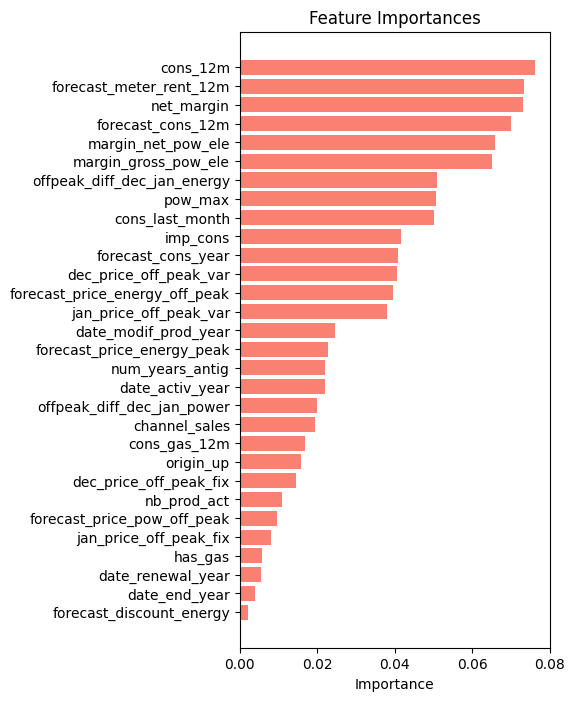

In [32]:
plt.figure(figsize=(4, 8))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='salmon', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [33]:
# Predict probabilities for discounted test data
proba_after_discount = best_rf_classifier.predict_proba(X_comp)

# Calculate churn rate before and after discount
churn_rate_before_discount = Y_test.mean()
churn_rate_after_discount = (proba_after_discount[:, 1] > 0.5).mean()  # Assuming churn predicted if probability > 0.5

# Print churn rates
print("Churn rate before discount:", churn_rate_before_discount)
print("Churn rate after discount:", churn_rate_after_discount)

Churn rate before discount: 0.09489851892484914
Churn rate after discount: 0.022970378496982996


In [34]:
prob_df = pd.DataFrame({
    'proba_after_dis' : proba_after_discount[:, 1],
})
comp_data = pd.concat([comp_data.reset_index(drop=True), prob_df], axis=1)

In [35]:
comp_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,date_renewal_year,dec_price_off_peak_var,dec_price_off_peak_fix,jan_price_off_peak_var,jan_price_off_peak_fix,offpeak_diff_dec_jan_energy,offpeak_diff_dec_jan_power,churn,churn_after_discount,proba_after_dis
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,0.00,0,0.0,1.78,0.114481,...,2015,0.116826,35.413544,0.100781,32.452776,0.016046,2.960768,1,0,0.326
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,189.95,0,0.0,16.27,0.145711,...,2015,0.118080,35.555768,0.121094,35.413545,-0.003014,0.142223,0,0,0.096
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,47.96,0,0.0,38.72,0.165794,...,2015,0.134238,35.555768,0.137974,35.413545,-0.003736,0.142223,0,0,0.113
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,240.04,0,0.0,19.83,0.146694,...,2015,0.118869,35.555768,0.122506,35.413545,-0.003638,0.142223,0,0,0.126
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,445.75,526,0.0,131.73,0.116900,...,2015,0.095925,32.583108,0.100878,32.452776,-0.004954,0.130332,0,0,0.159


In [36]:
df['churn_after_discount'] =  comp_data['churn_after_discount']

---
## **BONUS TASK**

#### Get total 12 month profit (revenue) made by each customer

#### Assuming 
- *revenue_12m = ( forecast_price_energy_off_peak + forecast_price_pow_off_peak ) * ( forecast_cons_12m )*

#### As we have the revenue forecast for next 12 months, we can easily consider that the revenue generated for company by individual customer. And also summation of it can give net profit that can be made from next 12 months

In [37]:
comp_data['revenue_12m'] = ( comp_data['forecast_price_energy_off_peak'] + comp_data['forecast_price_pow_off_peak'] ) * ( comp_data['forecast_cons_12m'] )

In [38]:
comp_data[['id','revenue_12m','churn','churn_after_discount','proba_after_dis']]

,id,revenue_12m,churn,churn_after_discount,proba_after_dis
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,1,0,0.326
1,d29c2c54acc38ff3c0614d0a653813dd,8444.624048,0,0,0.096
2,764c75f661154dac3a6c254cd082ea7d,2133.125167,0,0,0.113
3,bba03439a292a1e166f80264c16191cb,10671.715593,0,0,0.126
4,149d57cf92fc41cf94415803a877cb4b,18152.545146,0,0,0.159
...,...,...,...,...,...
14579,18463073fb097fc0ac5d3e040f356987,206602.570895,0,0,0.300
14580,d0a6f71671571ed83b2645d23af6de00,37330.427386,1,1,0.666
14581,10e6828ddd62cbcf687cb74928c4c2d2,7753.366394,1,1,0.534
14582,1cf20fd6206d7678d5bcafd28c53b4db,859.800100,0,0,0.161


Implementing discount strategies presents a challenge as offering discounts to all customers could result in substantial losses. To address this, companies can adopt two approaches:

- **Giving Discount Only for Most Profitable Customers:** This strategy targets customers who contribute the most to the company's revenue. By identifying and providing discounts exclusively to highly profitable customers, the company can focus retention efforts where they have the greatest impact. This approach minimizes the risk of significant revenue loss while maximizing retention efficiency.

- **Giving Discount Only for Potential Churning Customers Based on Model Predictions:** Leveraging predictive analytics, this approach identifies customers who are at risk of churning in the near future. Discounts are then offered selectively to this subset of customers, aiming to incentivize their continued patronage and mitigate churn. By targeting potential churners, the company can optimize its retention efforts, reducing losses associated with customer attrition while maintaining profitability.

### **A) Giving discount only for Most Profitable Customers**
 1. **Visualizing Revenue Distribution**: By plotting the distribution of revenue_12, you can gain insights into the spread and central tendency of revenue values across all customers. This visualization can help you understand the range of revenue values and identify any patterns or outliers.

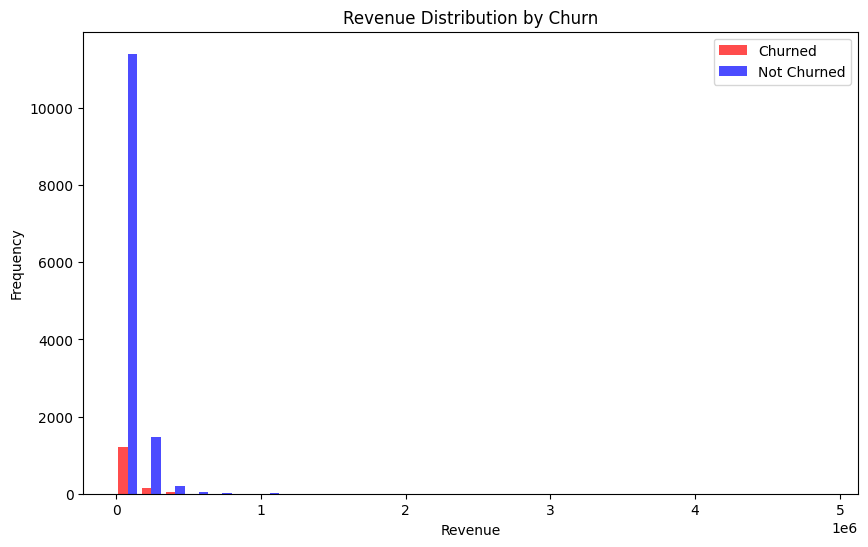

In [39]:
# Filter data for churned and non-churned customers
churned = comp_data[comp_data['churn'] == 1]['revenue_12m']
not_churned = comp_data[comp_data['churn'] == 0]['revenue_12m']

# Set up the histogram parameters
plt.figure(figsize=(10, 6))
plt.hist([churned, not_churned], bins=30, color=['red', 'blue'], alpha=0.7, label=['Churned', 'Not Churned'])

# Add labels and title
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Revenue Distribution by Churn')
plt.legend()

# Show plot
plt.show()

2. **Setting the Mean Revenue as the Threshold**: The mean revenue_12 value represents the average revenue generated by customers over the specified time period. Setting this value as the threshold allows you to distinguish between customers with revenue above the average (potentially highly profitable) and those below the average.

3. **Threshold for Segmenting Customers**: Using the mean revenue as the threshold provides a simple and intuitive way to segment customers into two groups: highly profitable and less profitable. This segmentation allows businesses to prioritize their focus and resources on retaining and nurturing highly profitable customers while also identifying opportunities to increase revenue from less profitable customers.


In [40]:
mean_revenue = comp_data['revenue_12m'].mean()
print('Threshold Revenue for Customer Segmentation',round(mean_revenue,2))

Threshold Revenue for Customer Segmentation 80613.77


4. **Identifying Highly Profitable Customers**: Customers whose revenue_12 exceeds the mean revenue are considered highly profitable according to this approach. These customers contribute above-average revenue to the business, indicating that they are significant contributors to overall profitability.

In [41]:
# No. of churn before applying discount
churn_cust_no_dis = comp_data.loc[comp_data['churn'] == 1]
print('No. of churn before applying Discount: ',churn_cust_no_dis.shape[0])

No. of churn before applying Discount:  1417


In [42]:
# No. of Highly Profitable churn customer
high_profit_churn_cust_no_dis = comp_data.loc[(comp_data['revenue_12m'] > mean_revenue) & (comp_data['churn'] == 1)]
print('No. of Highly Profitable Churned Customer: ',high_profit_churn_cust_no_dis.shape[0])

No. of Highly Profitable Churned Customer:  489


#### Finding the profit made from Highly Profitable Churned Customer by providing 20% discount
#### *Assumption*
- All the customers agreed on staying for discounts

In [43]:
# No. of Highly Profitable Churn Customer after discount
high_profit_churn_cust_yes_dis = comp_data.loc[(comp_data['revenue_12m'] > mean_revenue) & ((comp_data['proba_after_dis'] < 0.5) & (comp_data['churn'] == 1))]
print('No. of Highly Profitable Churned Customer who agreed on staying for discounts: ',high_profit_churn_cust_yes_dis.shape[0])

No. of Highly Profitable Churned Customer who agreed on staying for discounts:  329


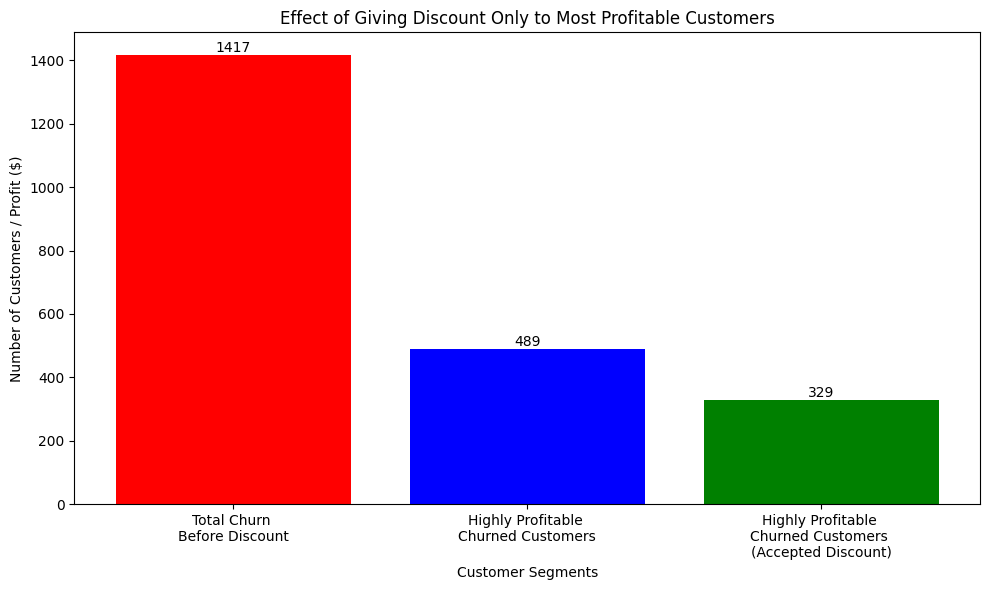

In [44]:
# Given values
labels = ['Total Churn \nBefore Discount', 'Highly Profitable \nChurned Customers', 
          'Highly Profitable \nChurned Customers \n(Accepted Discount)'
          ]
values = [churn_cust_no_dis.shape[0], high_profit_churn_cust_no_dis.shape[0], 
          high_profit_churn_cust_yes_dis.shape[0], 
          ]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['red', 'blue', 'green'])
plt.title('Effect of Giving Discount Only to Most Profitable Customers')
plt.xlabel('Customer Segments')
plt.ylabel('Number of Customers / Profit ($)')
# plt.xticks(rotation=90, ha='right')

# Displaying the values on top of each bar
for i in range(len(labels)):
    plt.text(i, values[i], str(values[i]), ha='center', va='bottom')

# Showing the plot
plt.tight_layout()
plt.show()

In [45]:
# Profit made by These customers
print('Profit made by Highly Profitable Customers on providing 20% discount is: ',round(high_profit_churn_cust_yes_dis['revenue_12m'].sum() * 0.8,2))

Profit made by Highly Profitable Customers on providing 20% discount is:  43978881.8


### **B) Giving discount for all Potentially Churnable Customers**
#### But this approach is difficult to implement and needs a lot of returns for this effort. Let's find that out!

In [46]:
# No of churn customers after discount
churn_cust_yes_dis = comp_data.loc[((comp_data['proba_after_dis'] < 0.5) & (comp_data['churn'] == 1))]
print('No. of Churned Customer who agreed on staying for discounts: ',churn_cust_yes_dis.shape[0])

No. of Churned Customer who agreed on staying for discounts:  1078


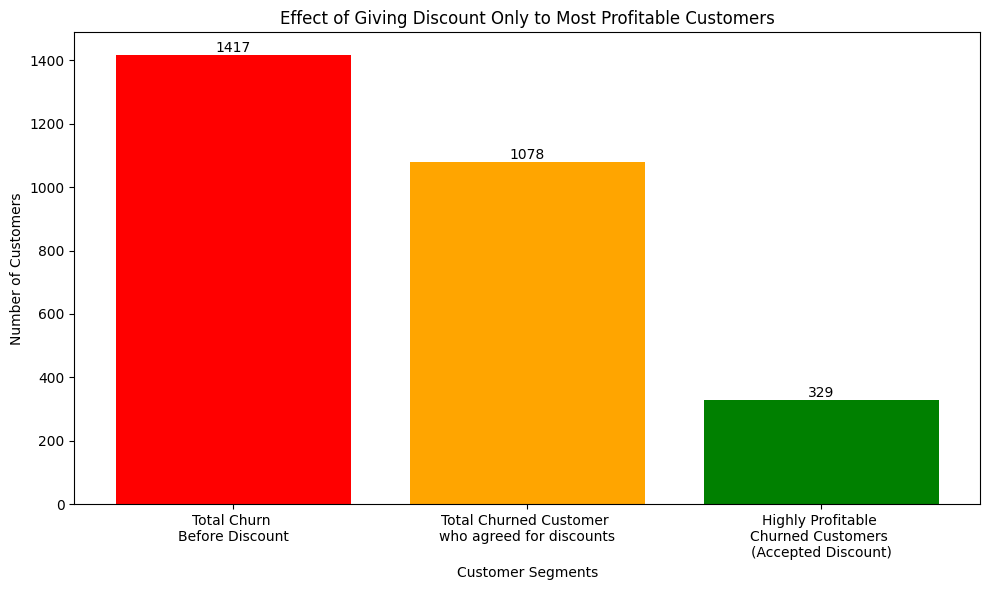

In [47]:
# Given values
labels = ['Total Churn \nBefore Discount', 'Total Churned Customer \nwho agreed for discounts', 
          'Highly Profitable \nChurned Customers \n(Accepted Discount)'
          ]
values = [churn_cust_no_dis.shape[0], churn_cust_yes_dis.shape[0], 
          high_profit_churn_cust_yes_dis.shape[0], 
          ]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['red', 'orange', 'green'])
plt.title('Effect of Giving Discount Only to Most Profitable Customers')
plt.xlabel('Customer Segments')
plt.ylabel('Number of Customers')
# plt.xticks(rotation=90, ha='right')

# Displaying the values on top of each bar
for i in range(len(labels)):
    plt.text(i, values[i], str(values[i]), ha='center', va='bottom')

# Showing the plot
plt.tight_layout()
plt.show()

#### Finding the profit made by Churned Customer on providing 20% discount
#### *Assumption*
- All the customers agreed on staying for discounts

In [48]:
# Profit made by These customers
print('Profit made by Customers on providing 20% discount is: ',round((churn_cust_yes_dis['revenue_12m'].sum()) * 0.8,2))

Profit made by Customers on providing 20% discount is:  63436559.7


In [49]:
# loss when no discount is introduced
print('Revenue Loss Due to Customer Churn: ',round(churn_cust_no_dis['revenue_12m'].sum(),2))

Revenue Loss Due to Customer Churn:  120753810.88


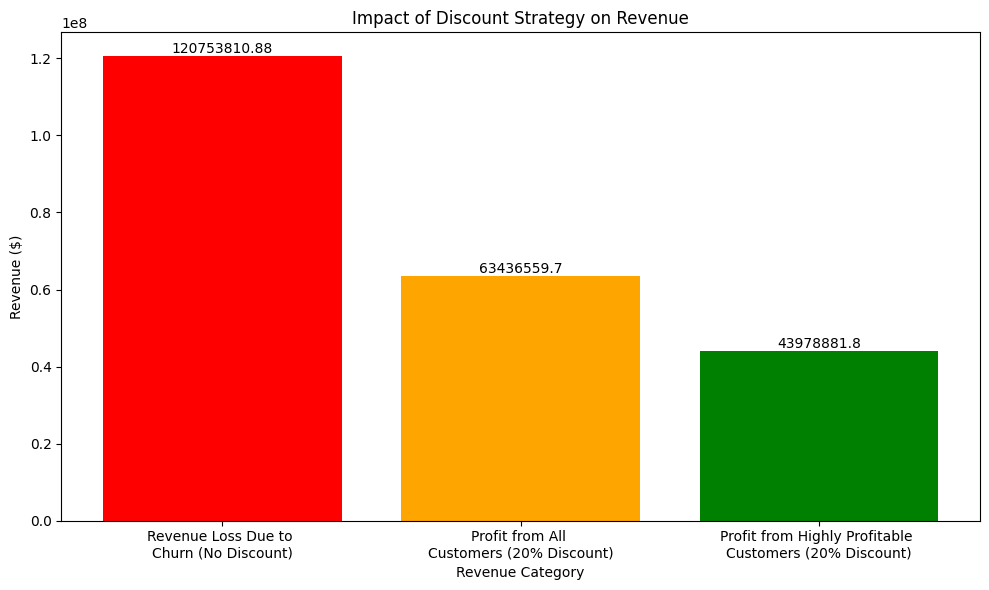

In [50]:
# Given values
labels = ['Revenue Loss Due to \nChurn (No Discount)',
          'Profit from All \nCustomers (20% Discount)',
          'Profit from Highly Profitable \nCustomers (20% Discount)'
          ]
values = [round(churn_cust_no_dis['revenue_12m'].sum(), 2),
          round(churn_cust_yes_dis['revenue_12m'].sum() * 0.8, 2),
          round(high_profit_churn_cust_yes_dis['revenue_12m'].sum() * 0.8, 2)
          ]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['red', 'orange', 'green'])
plt.title('Impact of Discount Strategy on Revenue')
plt.xlabel('Revenue Category')
plt.ylabel('Revenue ($)')
# plt.xticks(rotation=45, ha='right')

# Displaying the values on top of each bar
for i in range(len(labels)):
    plt.text(i, values[i], str(values[i]), ha='center', va='bottom')

# Showing the plot
plt.tight_layout()
plt.show()


## *Insights*

In [51]:
print('''Initially the loss faced by the company is ''',round(churn_cust_no_dis['revenue_12m'].sum(),2),'. \n'
      '''By analyzing the provided data we have found two approaches
      1. By just focusing on''',high_profit_churn_cust_yes_dis.shape[0],'''customers can reduce the loss by''',round(((high_profit_churn_cust_yes_dis['revenue_12m'].sum()) * 0.8/churn_cust_no_dis['revenue_12m'].sum())*100,2),'''%
      2. A large number of''',churn_cust_yes_dis.shape[0],'''customers can reduce the loss by''',round(((churn_cust_yes_dis['revenue_12m'].sum()) * 0.8/churn_cust_no_dis['revenue_12m'].sum())*100,2),'''%''')

Initially the loss faced by the company is  120753810.88 . 
By analyzing the provided data we have found two approaches
      1. By just focusing on 329 customers can reduce the loss by 36.42 %
      2. A large number of 1078 customers can reduce the loss by 52.53 %


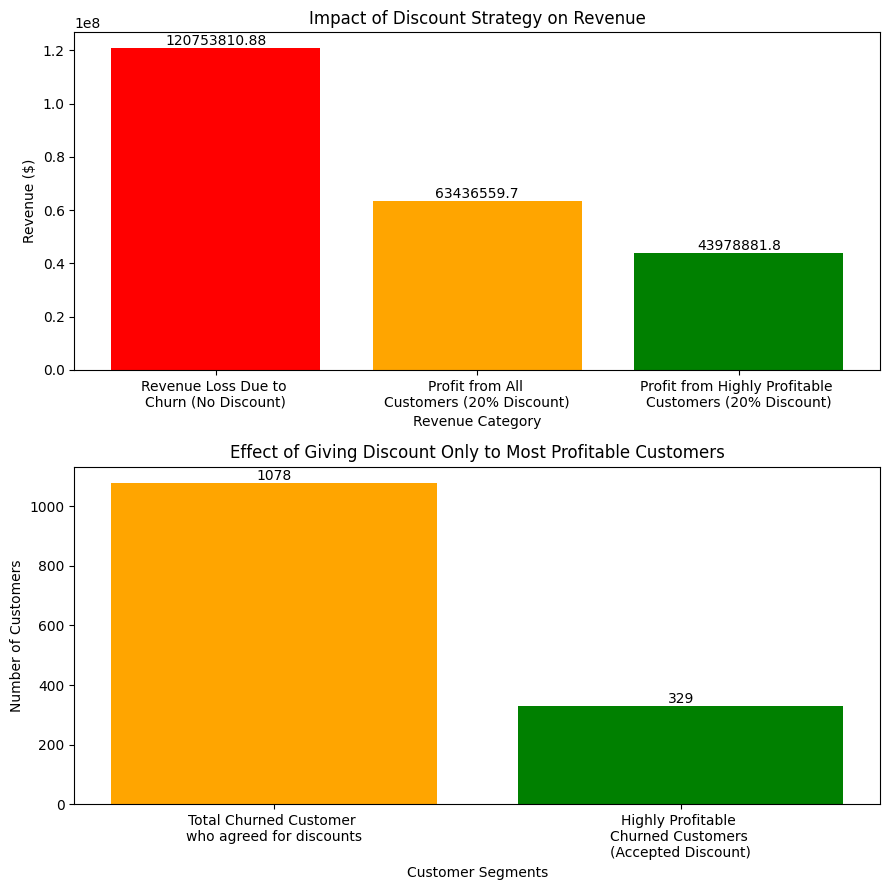

In [52]:
# Given values for the first graph
labels1 = ['Revenue Loss Due to \nChurn (No Discount)',
          'Profit from All \nCustomers (20% Discount)',
          'Profit from Highly Profitable \nCustomers (20% Discount)'
          ]
values1 = [round(churn_cust_no_dis['revenue_12m'].sum(), 2),
          round(churn_cust_yes_dis['revenue_12m'].sum() * 0.8, 2),
          round(high_profit_churn_cust_yes_dis['revenue_12m'].sum() * 0.8, 2)
          ]

# Given values for the second graph
labels2 = ['Total Churned Customer \nwho agreed for discounts', 
          'Highly Profitable \nChurned Customers \n(Accepted Discount)'
          ]
values2 = [churn_cust_yes_dis.shape[0], 
          high_profit_churn_cust_yes_dis.shape[0], 
          ]

# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 9))

# Plotting the first bar graph
ax1.bar(labels1, values1, color=['red', 'orange', 'green'])
ax1.set_title('Impact of Discount Strategy on Revenue')
ax1.set_xlabel('Revenue Category')
ax1.set_ylabel('Revenue ($)')

# Displaying the values on top of each bar in the first graph
for i in range(len(labels1)):
    ax1.text(i, values1[i], str(values1[i]), ha='center', va='bottom')

# Plotting the second bar graph
ax2.bar(labels2, values2, color=['orange', 'green'])
ax2.set_title('Effect of Giving Discount Only to Most Profitable Customers')
ax2.set_xlabel('Customer Segments')
ax2.set_ylabel('Number of Customers')

# Displaying the values on top of each bar in the second graph
for i in range(len(labels2)):
    ax2.text(i, values2[i], str(values2[i]), ha='center', va='bottom')

# Adjusting layout
plt.tight_layout()

# Showing the plot
plt.show()


Focusing on highly profitable customers yields more efficient retention strategies due to their lower numbers and higher revenue potential. The green bar, representing highly profitable churned customers who accepted the discount, shows a smaller number of customers compared to the orange bar, indicating a manageable group to engage with. Additionally, retaining these customers results in a more significant revenue impact, as they contribute substantially to the company's bottom line. Prioritizing efforts towards this segment maximizes retention efficiency and minimizes potential losses, making it a strategic approach for optimizing profitability while mitigating churn.

---
Based on the provided insights, here are some suggestions for the company to reduce losses:

1. **Focus on High-Impact Customers**:
   - Consider prioritizing efforts to retain or engage with the customers identified in the first approach. These customers seem to have a significant impact on reducing the company's losses.
   - Implement targeted retention strategies, personalized communication, and loyalty programs to incentivize these customers to continue their relationship with the company.

2. **Expand the Customer Base**:
   - Explore opportunities to attract and retain a larger number of customers, as suggested by the second approach.
   - Invest in marketing efforts, customer acquisition channels, and product/service offerings that appeal to a broader audience.
   - Focus on improving customer satisfaction, product quality, and overall customer experience to attract and retain a larger customer base.

3. **Diversify Revenue Streams**:
   - Consider diversifying revenue streams by offering new products or services that cater to different customer segments or address emerging market needs.
   - Explore partnerships, collaborations, or acquisitions that can broaden the company's product portfolio and revenue sources.

4. **Optimize Cost Structure**:
   - Evaluate and optimize the company's cost structure to reduce overhead expenses and improve profitability.
   - Identify areas where costs can be streamlined, such as operational efficiencies, supply chain management, and resource allocation.

5. **Data-Driven Decision Making**:
   - Continue to analyze customer data and performance metrics to identify trends, patterns, and opportunities for improvement.
   - Use predictive analytics and machine learning algorithms to forecast customer behavior, identify churn risk, and personalize marketing efforts.

6. **Customer Engagement and Retention**:
   - Implement proactive customer engagement strategies to enhance loyalty and reduce churn.
   - Provide exceptional customer service, address customer feedback and complaints promptly, and create a positive brand reputation.

7. **Long-Term Growth Strategy**:
   - Develop a long-term growth strategy that focuses on sustainable revenue growth, profitability, and customer lifetime value.
   - Invest in innovation, research and development, and long-term customer relationships to drive sustainable business growth.

By implementing these suggestions, the company can work towards reducing losses, increasing revenue, and building a stronger foundation for long-term success and profitability. It's essential to continuously monitor and adjust strategies based on market dynamics, customer feedback, and performance metrics to ensure sustained improvement and competitiveness.

---